In [1]:
import scanpy as sc
data_dir = '../../dataset/Marshall2022High_human_sampled.h5ad'
adata = sc.read_h5ad(data_dir)
adata.X = adata.raw.X

In [2]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [3]:
adata.var['gene_id'] = adata.var.index
adata.var.index = adata.var['gene_name']

# 输出 adata.var
adata.var

,feature_reference,feature_biotype,feature_is_filtered-0,feature_name-0,feature_length-0,feature_type-0,feature_is_filtered-1,feature_name-1,feature_length-1,feature_type-1,...,feature_is_filtered-6,feature_name-6,feature_length-6,feature_type-6,feature_is_filtered-7,feature_name-7,feature_length-7,feature_type-7,gene_name,gene_id
gene_name,,,,,,,,,,,,,,,,,,,,,
A1BG,NCBITaxon:9606,gene,True,A1BG,2134,protein_coding,False,A1BG,2134,protein_coding,...,True,A1BG,2134,protein_coding,True,A1BG,2134,protein_coding,A1BG,ENSG00000121410
A1BG-AS1,NCBITaxon:9606,gene,False,A1BG-AS1,1667,lncRNA,False,A1BG-AS1,1667,lncRNA,...,False,A1BG-AS1,1667,lncRNA,False,A1BG-AS1,1667,lncRNA,A1BG-AS1,ENSG00000268895
A1CF,NCBITaxon:9606,gene,False,A1CF,2211,protein_coding,False,A1CF,2211,protein_coding,...,False,A1CF,2211,protein_coding,False,A1CF,2211,protein_coding,A1CF,ENSG00000148584
A2M,NCBITaxon:9606,gene,False,A2M,590,protein_coding,False,A2M,590,protein_coding,...,False,A2M,590,protein_coding,False,A2M,590,protein_coding,A2M,ENSG00000175899
A2M-AS1,NCBITaxon:9606,gene,False,A2M-AS1,2551,lncRNA,False,A2M-AS1,2551,lncRNA,...,False,A2M-AS1,2551,lncRNA,False,A2M-AS1,2551,lncRNA,A2M-AS1,ENSG00000245105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ3,NCBITaxon:9606,gene,False,ZZZ3,686,protein_coding,False,ZZZ3,686,protein_coding,...,False,ZZZ3,686,protein_coding,False,ZZZ3,686,protein_coding,ZZZ3,ENSG00000036549
MISP3,NCBITaxon:9606,gene,False,MISP3,1473,protein_coding,False,MISP3,1473,protein_coding,...,False,MISP3,1473,protein_coding,False,MISP3,1473,protein_coding,MISP3,ENSG00000141854
ENSG00000234352.9,NCBITaxon:9606,gene,False,ENSG00000234352.9,728,lncRNA,False,ENSG00000234352.9,728,lncRNA,...,False,ENSG00000234352.9,728,lncRNA,False,ENSG00000234352.9,728,lncRNA,ENSG00000234352.9,ENSG00000234352


In [4]:
import scanpy as sc
import torch
from torch import nn
import lightning.pytorch as pl
from self_supervision.models.lightning_modules.cellnet_autoencoder import MLPAutoEncoder
from self_supervision.estimator.cellnet import EstimatorAutoEncoder

# 设置你的 .ckpt 文件路径
ckpt_path = "../../sc_pretrained/Pretrained Models/RandomMask.ckpt"

# 模型参数
units_encoder = [512, 512, 256, 256, 64]
units_decoder = [256, 256, 512, 512]

# 初始化 EstimatorAutoEncoder 实例
estim = EstimatorAutoEncoder(data_path=None)  # 如果没有实际数据路径，可以设置为None

# 加载预训练模型
estim.model = MLPAutoEncoder.load_from_checkpoint(
    ckpt_path,
    gene_dim=19331,  # 根据你的数据调整
    batch_size=128,  # 根据你的需要调整
    units_encoder=units_encoder, 
    units_decoder=units_decoder,
    masking_strategy="random",  # 假设模型使用了随机掩码
    masking_rate=0.5,  # 根据需要调整
)

# 使用 GPU 进行评估（如果可用）
estim.trainer = pl.Trainer(accelerator="gpu", devices=1 if torch.cuda.is_available() else None)
estim.model

/home/hanchuangyi/miniconda3/envs/ssl/lib/python3.10/site-packages/merlin/dtypes/mappings/tf.py:52: UserWarning: Tensorflow dtype mappings did not load successfully due to an error: No module named 'tensorflow'
  warn(f"Tensorflow dtype mappings did not load successfully due to an error: {exc.msg}")
/home/hanchuangyi/miniconda3/envs/ssl/lib/python3.10/site-packages/merlin/dtypes/mappings/triton.py:53: UserWarning: Triton dtype mappings did not load successfully due to an error: No module named 'tritonclient'
  warn(f"Triton dtype mappings did not load successfully due to an error: {exc.msg}")


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs


MLPAutoEncoder(
  (train_metrics): MetricCollection(
    (explained_var_uniform): ExplainedVariance()
    (explained_var_weighted): ExplainedVariance()
    (mse): MeanSquaredError(),
    prefix=train_
  )
  (val_metrics): MetricCollection(
    (explained_var_uniform): ExplainedVariance()
    (explained_var_weighted): ExplainedVariance()
    (mse): MeanSquaredError(),
    prefix=val_
  )
  (test_metrics): MetricCollection(
    (explained_var_uniform): ExplainedVariance()
    (explained_var_weighted): ExplainedVariance()
    (mse): MeanSquaredError(),
    prefix=test_
  )
  (encoder): MLP(
    (0): Linear(in_features=19331, out_features=512, bias=True)
    (1): SELU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): SELU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): SELU()
    (8): Dropout(p=0.1, inplace=False)
    (9): Linear(in_features=256, out_features=256, b

In [5]:
# 添加分类层 (FC)
n_classes = len(adata.obs['cell_type'].unique())
estim.model.fc = nn.Linear(units_encoder[-1], n_classes)
n_classes

14

In [6]:
import pandas as pd
var_df = pd.read_parquet('../../sc_pretrained/var.parquet')
var_df

,feature_id,feature_name
0,ENSG00000186092,OR4F5
1,ENSG00000284733,OR4F29
2,ENSG00000284662,OR4F16
3,ENSG00000187634,SAMD11
4,ENSG00000188976,NOC2L
...,...,...
19326,ENSG00000288702,UGT1A3
19327,ENSG00000288705,UGT1A5
19328,ENSG00000182484,WASH6P
19329,ENSG00000288622,PDCD6-AHRR


In [7]:
all_genes = var_df['feature_name'].tolist()
all_genes

['OR4F5',
 'OR4F29',
 'OR4F16',
 'SAMD11',
 'NOC2L',
 'KLHL17',
 'PLEKHN1',
 'PERM1',
 'HES4',
 'ISG15',
 'AGRN',
 'RNF223',
 'C1orf159',
 'TTLL10',
 'TNFRSF18',
 'TNFRSF4',
 'SDF4',
 'B3GALT6',
 'C1QTNF12',
 'UBE2J2',
 'SCNN1D',
 'ACAP3',
 'PUSL1',
 'INTS11',
 'CPTP',
 'TAS1R3',
 'DVL1',
 'MXRA8',
 'AURKAIP1',
 'CCNL2',
 'MRPL20',
 'ANKRD65',
 'TMEM88B',
 'VWA1',
 'ATAD3C',
 'ATAD3B',
 'ATAD3A',
 'TMEM240',
 'SSU72',
 'FNDC10',
 'MIB2',
 'MMP23B',
 'CDK11B',
 'SLC35E2B',
 'CDK11A',
 'NADK',
 'GNB1',
 'CALML6',
 'TMEM52',
 'CFAP74',
 'GABRD',
 'PRKCZ',
 'FAAP20',
 'SKI',
 'MORN1',
 'RER1',
 'PEX10',
 'PLCH2',
 'PANK4',
 'HES5',
 'TNFRSF14',
 'PRXL2B',
 'MMEL1',
 'TTC34',
 'ACTRT2',
 'PRDM16',
 'ARHGEF16',
 'MEGF6',
 'TPRG1L',
 'WRAP73',
 'TP73',
 'CCDC27',
 'SMIM1',
 'LRRC47',
 'CEP104',
 'DFFB',
 'C1orf174',
 'AJAP1',
 'NPHP4',
 'KCNAB2',
 'CHD5',
 'RPL22',
 'RNF207',
 'ICMT',
 'HES3',
 'GPR153',
 'ACOT7',
 'HES2',
 'ESPN',
 'TNFRSF25',
 'PLEKHG5',
 'NOL9',
 'TAS1R1',
 'ZBTB48',
 'KLH

In [8]:
existing_genes = adata.var['gene_name']
existing_genes

gene_name
A1BG                                              A1BG
A1BG-AS1                                      A1BG-AS1
A1CF                                              A1CF
A2M                                                A2M
A2M-AS1                                        A2M-AS1
                                       ...            
ZZZ3                                              ZZZ3
MISP3                                            MISP3
ENSG00000234352.9                    ENSG00000234352.9
ARHGAP27P1-BPTFP1-KPNA2P3    ARHGAP27P1-BPTFP1-KPNA2P3
SBNO1-AS1                                    SBNO1-AS1
Name: gene_name, Length: 20299, dtype: category
Categories (25391, object): ['7SK_ENSG00000202198', 'A1BG', 'A1BG-AS1', 'A1CF', ..., 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3']

In [9]:
# 将所有基因名称转换为小写
all_genes_lower = [gene.lower() for gene in all_genes]
adata_genes_lower = [gene.lower() for gene in existing_genes]

# 将两个列表转换为集合
all_genes_set = set(all_genes_lower)
adata_genes_set = set(adata_genes_lower)

# 计算交集
matching_genes = all_genes_set.intersection(adata_genes_set)
matching_count = len(matching_genes)
# 计算不匹配的基因
non_matching_genes = adata_genes_set - matching_genes
non_matching_count = len(non_matching_genes)


# 输出结果
print(f"匹配的基因数量: {matching_count}")
print(f"匹配的基因列表: {matching_genes}")
non_matching_genes


匹配的基因数量: 15360
匹配的基因列表: {'lmbr1', 'cit', 'tll2', 'gpat2', 'clnk', 'neto1', 'plxna2', 'bbip1', 'cltcl1', 'il17d', 'pabir3', 'ddah1', 'meaf6', 'cep135', 'ctbp1', 'gata2', 'tmem30a', 'tmem107', 'ankdd1b', 'apaf1', 'dzip1', 'esyt3', 'pcsk7', 'ptprr', 'cntn1', 'ggt1', 'mrtfb', 'coil', 'gk', 'slc37a4', 'eif4g3', 'wdr89', 'bckdk', 'kiaa0513', 'cyth3', 'supt6h', 'zmat1', 'ssx2ip', 'zc2hc1c', 'fxyd5', 'gabra2', 'helz2', 'ccl28', 'cmc1', 'selenop', 'pcgf1', 'ccdc74a', 'mfsd6', 'nsmce3', 'fubp1', 'ccdc113', 'erich6', 'spns2', 'pdcd5', 'higd2a', 'mdm4', 'tmod1', 'cpe', 'pttg1ip', 'sypl1', 'rrm2b', 'cfap410', 'rasgrp3', 'trpm1', 'uts2b', 'numb', 'scd', 'cox11', 'eid1', 'atp1a3', 'lmcd1', 'acvrl1', 'rubcnl', 'tanc1', 'hnrnph2', 'tex30', 'dcaf12l1', 'msr1', 'galnt2', 'ier2', 'tsc22d2', 'arhgap11a', 'pknox2', 'gpbp1l1', 'erich2', 'mcf2l2', 'fbp1', 'rpp25l', 'mrpl39', 'shcbp1', 'mdh1', 'nktr', 'inpp5k', 'pik3cg', 'lck', 's100a13', 'lingo2', 'tln2', 'ctu2', 'chek2', 'strada', 'rbm5', 'ost4', 'znf436', '

{'cbarp-dt',
 'linc01609',
 'rimoc1',
 'ensg00000229389.3',
 'myg1-as1',
 'linc01134',
 'pik3ca-dt',
 'ensg00000256615.1',
 'nr4a1as',
 'loxl1-as1',
 'rpl26l1-as1',
 'ensg00000256566.1',
 'linc02949',
 'ensg00000159239.13',
 'nav2-as3',
 'pdgfa-dt',
 'linc01118',
 'fam88b',
 'h1-10-as1',
 'ensg00000271917.1',
 'linc00964',
 'linc01010',
 'ensg00000261543.1',
 'ensg00000255829.1',
 'rn7skp30',
 'ensg00000239300.6',
 'fbxo38-dt',
 'linc02482',
 'ensg00000272305.5',
 'meg8',
 'linc01085',
 'ensg00000259986.2',
 'ensg00000229269.1',
 'zng1b',
 'ensg00000231683.6',
 'ensg00000257925.1',
 'ensg00000269495.1',
 'ankrd44-it1',
 'ensg00000242798.1',
 'linc00595',
 'bcl2l1-as1',
 'ensg00000251393.5',
 'ank3-dt',
 'cibar1-dt',
 'rhpn1-as1',
 'ensg00000272555.1',
 'zbtb46-as2',
 'linc02842',
 'ensg00000224228.2',
 'ttc28-as1',
 'ensg00000251680.6',
 'ensg00000249631.7',
 'ensg00000260173.1',
 'linc02413',
 'linc01277',
 'ensg00000260920.2',
 'rbm15-as1',
 'linc02910',
 'tiparp-as1',
 'igkc',
 'lin

In [10]:
gene_to_index = {gene: idx for idx, gene in enumerate(all_genes_lower)}
gene_to_index

{'or4f5': 0,
 'or4f29': 1,
 'or4f16': 2,
 'samd11': 3,
 'noc2l': 4,
 'klhl17': 5,
 'plekhn1': 6,
 'perm1': 7,
 'hes4': 8,
 'isg15': 9,
 'agrn': 10,
 'rnf223': 11,
 'c1orf159': 12,
 'ttll10': 13,
 'tnfrsf18': 14,
 'tnfrsf4': 15,
 'sdf4': 16,
 'b3galt6': 17,
 'c1qtnf12': 18,
 'ube2j2': 19,
 'scnn1d': 20,
 'acap3': 21,
 'pusl1': 22,
 'ints11': 23,
 'cptp': 24,
 'tas1r3': 25,
 'dvl1': 26,
 'mxra8': 27,
 'aurkaip1': 28,
 'ccnl2': 29,
 'mrpl20': 30,
 'ankrd65': 31,
 'tmem88b': 32,
 'vwa1': 33,
 'atad3c': 34,
 'atad3b': 35,
 'atad3a': 36,
 'tmem240': 37,
 'ssu72': 38,
 'fndc10': 39,
 'mib2': 40,
 'mmp23b': 41,
 'cdk11b': 42,
 'slc35e2b': 43,
 'cdk11a': 44,
 'nadk': 45,
 'gnb1': 46,
 'calml6': 47,
 'tmem52': 48,
 'cfap74': 49,
 'gabrd': 50,
 'prkcz': 51,
 'faap20': 52,
 'ski': 53,
 'morn1': 54,
 'rer1': 55,
 'pex10': 56,
 'plch2': 57,
 'pank4': 58,
 'hes5': 59,
 'tnfrsf14': 60,
 'prxl2b': 61,
 'mmel1': 62,
 'ttc34': 63,
 'actrt2': 64,
 'prdm16': 65,
 'arhgef16': 66,
 'megf6': 67,
 'tprg1l': 68

In [11]:
only_in_all_genes = all_genes_set - adata_genes_set

only_in_adata_genes = adata_genes_set - all_genes_set

# 输出结果
print(f"仅在 all_genes 中存在的基因数量: {len(only_in_all_genes)}")
print(f"仅在 all_genes 中存在的基因: {only_in_all_genes}")

print(f"仅在 adata_genes 中存在的基因数量: {len(only_in_adata_genes)}")
print(f"仅在 adata_genes 中存在的基因: {only_in_adata_genes}")


仅在 all_genes 中存在的基因数量: 3971
仅在 all_genes 中存在的基因: {'gjb4', 'zscan26', 'taf11l9', 'c16orf78', 'or6b1', 'pdc', 'hbe1', 'krtap4-11', 'or52n1', 'tgm5', 'fam126a', 'c16orf90', 'kncn', 'bmp15', 'rdh8', 'tm4sf20', 'or6b2', 'ampd1', 'optc', 'c20orf202', 'tspy9p', 'h4c5', 'gpr84', 'or13c2', 'nox5', 'golga6l4', 'ugt1a10', 'triml1', 'ccdc194', 'magea11', 'aqp12a', 'h2bu1', 'myh6', 'cntn2', 'adgrf2', 'spanxn5', 'ccdc144a', 'ifnk', 'or1k1', 'abhd16b', 'scx', 'or52n2', 'h2ac18', 'rasa4b', 'c8orf37', 'hcrt', 'alx4', 'poteg', 'znf559-znf177', 'rnf115', 's100a7l2', 'gage12g', 'npipa8', 'actrt1', 'rbm14-rbm4', 'prss54', 'tmem249', 'fam170b', 'pcdhb11', 'atxn3l', 'krtap26-1', 'tbc1d3e', 'magea10', 'ace', 'omp', 'cgb2', 'nxf3', 'cbwd6', 'tpsd1', 'myh4', 'wdr61', 'or10j5', 'fsd1', 'magea4', 'lims3', 'h2ac4', 'fam131b', 'c12orf73', 'ankrd63', 'retn', 'scgb3a2', 'prl', 'or8h1', 'zg16', 'h4c13', 'tspy8', 'krt17', 'pla2g4b', 'mrgprg', 'tbx22', 'atp5mf-ptcd1', 'oosp2', 'gcom1', 'art1', 'ccnq', 'dpf1', 'tfap2d', 

In [12]:
import numpy as np
from scipy.sparse import csr_matrix

# Initialize a mapping from gene names in adata to their column indices
adata_gene_to_index = {gene: idx for idx, gene in enumerate(adata_genes_lower)}

# Create an array to map adata.X column indices to new_data column indices
adata_to_new_data_indices = -1 * np.ones(adata.X.shape[1], dtype=int)
for idx, gene in enumerate(adata_genes_lower):
    if gene in gene_to_index:
        adata_to_new_data_indices[idx] = gene_to_index[gene]



# Extract data from adata.X without converting it to a dense array
data = adata.X.data
indices = adata.X.indices
indptr = adata.X.indptr

# Map the column indices to the new indices in new_data
mapped_indices = adata_to_new_data_indices[indices]

# Filter out entries where the mapping is invalid (-1)
valid_entries = mapped_indices != -1
new_data_values = data[valid_entries]
new_data_indices = mapped_indices[valid_entries]

# Build the new indptr array for the new_data matrix
new_indptr = np.zeros(adata.X.shape[0] + 1, dtype=int)


for i in range(adata.X.shape[0]):
    row_start = indptr[i]
    row_end = indptr[i + 1]
    valid_count = np.sum(valid_entries[row_start:row_end])
    new_indptr[i + 1] = new_indptr[i] + valid_count


# Construct the new_data sparse matrix
new_data = csr_matrix(
    (new_data_values, new_data_indices, new_indptr),
    shape=(adata.X.shape[0], len(all_genes)),
    dtype=np.float32
)
new_data = new_data.toarray()

In [13]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split


label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(adata.obs['cell_type'])  # 预先编码标签


random_seed = 42
X_train_val, X_test, y_train_val, y_test = train_test_split(
    new_data, labels_encoded, test_size=0.15, random_state=random_seed)


X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, random_state=random_seed)  # 0.1765 是为了让验证集占 15%

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)



# 将训练数据转换为张量
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train).float().to(device)
y_train_tensor = torch.tensor(y_train).long().to(device)
X_val_tensor = torch.tensor(X_val).float().to(device)
y_val_tensor = torch.tensor(y_val).long().to(device)
estim.model.to(device)

cuda


MLPAutoEncoder(
  (train_metrics): MetricCollection(
    (explained_var_uniform): ExplainedVariance()
    (explained_var_weighted): ExplainedVariance()
    (mse): MeanSquaredError(),
    prefix=train_
  )
  (val_metrics): MetricCollection(
    (explained_var_uniform): ExplainedVariance()
    (explained_var_weighted): ExplainedVariance()
    (mse): MeanSquaredError(),
    prefix=val_
  )
  (test_metrics): MetricCollection(
    (explained_var_uniform): ExplainedVariance()
    (explained_var_weighted): ExplainedVariance()
    (mse): MeanSquaredError(),
    prefix=test_
  )
  (encoder): MLP(
    (0): Linear(in_features=19331, out_features=512, bias=True)
    (1): SELU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): SELU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): SELU()
    (8): Dropout(p=0.1, inplace=False)
    (9): Linear(in_features=256, out_features=256, b

In [14]:
# 6. 微调模型
for param in estim.model.encoder.parameters():
    param.requires_grad = False  # 冻结所有层

for param in list(estim.model.encoder.parameters())[-5:]:
    param.requires_grad = True

In [15]:
from torch.optim import AdamW
# 定义损失函数和优化器
loss_fn = nn.CrossEntropyLoss()
optimizer = AdamW(filter(lambda p: p.requires_grad, estim.model.parameters()), lr=9e-4, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)

In [16]:
from torch.utils.data import DataLoader, TensorDataset

# 设置 batch size
batch_size = 128  # 根据实际需求调整 batch size

# 使用 TensorDataset 将训练数据和标签打包
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# 使用 DataLoader 来创建批次
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 7. 微调模型
def train_epoch(model, optimizer, loss_fn, train_loader, val_loader):
    model.train()
    total_train_loss = 0
    
    # 训练集批次训练
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        
        # 前向传播
        outputs = model.encoder(X_batch)
        logits = model.fc(outputs)
        
        # 计算损失
        loss = loss_fn(logits, y_batch)
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss.item()
    
    # 验证集
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            val_outputs = model.encoder(X_val_batch)
            val_logits = model.fc(val_outputs)
            val_loss = loss_fn(val_logits, y_val_batch)
            total_val_loss += val_loss.item()

    # 返回平均损失
    return total_train_loss / len(train_loader), total_val_loss / len(val_loader)

In [17]:
import copy  # 用于保存模型的最佳状态

# Early Stopping 参数
patience = 20  # 如果验证损失在 10 个 epoch 中没有改善，停止训练
min_delta = 1e-4  # 最小改善幅度
patience_counter = 0
best_val_loss = float('inf')  # 初始设置为正无穷大
best_model_weights = copy.deepcopy(estim.model.state_dict())  # 保存最佳模型权重
train_losses = []
val_losses = []

# 训练 500 个 epoch
for epoch in range(500):
    train_loss, val_loss = train_epoch(estim.model, optimizer, loss_fn, train_loader, val_loader)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss}, Validation Loss: {val_loss}')
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Early Stopping 检查
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss  # 更新最佳验证损失
        patience_counter = 0  # 重置 patience 计数器
        best_model_weights = copy.deepcopy(estim.model.state_dict())  # 保存当前最佳模型
        print(f"Validation loss improved to {best_val_loss} at epoch {epoch+1}, resetting patience.")
    else:
        patience_counter += 1
        print(f"No improvement in validation loss. Patience counter: {patience_counter}/{patience}")
    
    # 如果 patience_counter 超过设置的 patience，停止训练
    if patience_counter >= patience:
        print(f"Early stopping triggered. Stopping training at epoch {epoch+1}.")
        break

# 恢复到训练中性能最好的模型权重
estim.model.load_state_dict(best_model_weights)
print("Loaded best model weights based on validation loss.")


Epoch 1, Train Loss: 1.4127210249493347, Validation Loss: 1.0934427685647214
Validation loss improved to 1.0934427685647214 at epoch 1, resetting patience.


Epoch 2, Train Loss: 1.1905178877611247, Validation Loss: 1.0580485440543477
Validation loss improved to 1.0580485440543477 at epoch 2, resetting patience.


Epoch 3, Train Loss: 1.1661300727091388, Validation Loss: 1.0473595391517567
Validation loss improved to 1.0473595391517567 at epoch 3, resetting patience.


Epoch 4, Train Loss: 1.1537728627361092, Validation Loss: 1.0442665900099335
Validation loss improved to 1.0442665900099335 at epoch 4, resetting patience.


Epoch 5, Train Loss: 1.1460327461801492, Validation Loss: 1.0452333135062484
No improvement in validation loss. Patience counter: 1/20


Epoch 6, Train Loss: 1.1418438974620124, Validation Loss: 1.0647379888742456
No improvement in validation loss. Patience counter: 2/20


Epoch 7, Train Loss: 1.1365574264211062, Validation Loss: 1.0314753487776807
Validation loss improved to 1.0314753487776807 at epoch 7, resetting patience.


Epoch 8, Train Loss: 1.13431545870714, Validation Loss: 1.0298470117469534
Validation loss improved to 1.0298470117469534 at epoch 8, resetting patience.


Epoch 9, Train Loss: 1.1310460789400103, Validation Loss: 1.0449619428806396
No improvement in validation loss. Patience counter: 1/20


Epoch 10, Train Loss: 1.126977886697647, Validation Loss: 1.0346704300545968
No improvement in validation loss. Patience counter: 2/20


Epoch 11, Train Loss: 1.124077634433036, Validation Loss: 1.0282851731607698
Validation loss improved to 1.0282851731607698 at epoch 11, resetting patience.


Epoch 12, Train Loss: 1.1228551030280267, Validation Loss: 1.0211173632133628
Validation loss improved to 1.0211173632133628 at epoch 12, resetting patience.


Epoch 13, Train Loss: 1.1185588507419442, Validation Loss: 1.0278551146317432
No improvement in validation loss. Patience counter: 1/20


Epoch 14, Train Loss: 1.1162001526974226, Validation Loss: 1.0231498420520981
No improvement in validation loss. Patience counter: 2/20


Epoch 15, Train Loss: 1.1150741548043424, Validation Loss: 1.0303125844747534
No improvement in validation loss. Patience counter: 3/20


Epoch 16, Train Loss: 1.1143412893204092, Validation Loss: 1.0263904355713542
No improvement in validation loss. Patience counter: 4/20


Epoch 17, Train Loss: 1.1130234963532504, Validation Loss: 1.0109284438228154
Validation loss improved to 1.0109284438228154 at epoch 17, resetting patience.


Epoch 18, Train Loss: 1.1108115487641987, Validation Loss: 1.0151024407120113
No improvement in validation loss. Patience counter: 1/20


Epoch 19, Train Loss: 1.1104734404768608, Validation Loss: 1.02041264817613
No improvement in validation loss. Patience counter: 2/20


Epoch 20, Train Loss: 1.1102956256934366, Validation Loss: 1.0194234017512245
No improvement in validation loss. Patience counter: 3/20


Epoch 21, Train Loss: 1.1101047748345445, Validation Loss: 1.0065643315631632
Validation loss improved to 1.0065643315631632 at epoch 21, resetting patience.


Epoch 22, Train Loss: 1.1066861995481645, Validation Loss: 1.0121413983439946
No improvement in validation loss. Patience counter: 1/20


Epoch 23, Train Loss: 1.106284556347623, Validation Loss: 1.0077516142790917
No improvement in validation loss. Patience counter: 2/20


Epoch 24, Train Loss: 1.1037021998471428, Validation Loss: 1.0070682252752838
No improvement in validation loss. Patience counter: 3/20


Epoch 25, Train Loss: 1.1040664158177884, Validation Loss: 1.0121912555107009
No improvement in validation loss. Patience counter: 4/20


Epoch 26, Train Loss: 1.1043485751714734, Validation Loss: 1.0078441088233514
No improvement in validation loss. Patience counter: 5/20


Epoch 27, Train Loss: 1.1003368131869444, Validation Loss: 1.0063784198738388
Validation loss improved to 1.0063784198738388 at epoch 27, resetting patience.


Epoch 28, Train Loss: 1.1006296716653197, Validation Loss: 1.0047360387458621
Validation loss improved to 1.0047360387458621 at epoch 28, resetting patience.


Epoch 29, Train Loss: 1.1020609971708102, Validation Loss: 1.008588762079935
No improvement in validation loss. Patience counter: 1/20


Epoch 30, Train Loss: 1.0991590850714628, Validation Loss: 0.9982664898673504
Validation loss improved to 0.9982664898673504 at epoch 30, resetting patience.


Epoch 31, Train Loss: 1.1003791470372422, Validation Loss: 0.999034237805136
No improvement in validation loss. Patience counter: 1/20


Epoch 32, Train Loss: 1.0983546278605263, Validation Loss: 1.0150832316321785
No improvement in validation loss. Patience counter: 2/20


Epoch 33, Train Loss: 1.0995455124128386, Validation Loss: 1.0097558859965248
No improvement in validation loss. Patience counter: 3/20


Epoch 34, Train Loss: 1.0985676246038651, Validation Loss: 1.0052595251544392
No improvement in validation loss. Patience counter: 4/20


Epoch 35, Train Loss: 1.099013246269944, Validation Loss: 1.0096328597498165
No improvement in validation loss. Patience counter: 5/20


Epoch 36, Train Loss: 1.0968402223936295, Validation Loss: 0.9994838927029434
No improvement in validation loss. Patience counter: 6/20


Epoch 37, Train Loss: 1.0964876572816564, Validation Loss: 1.0177124043776526
No improvement in validation loss. Patience counter: 7/20


Epoch 38, Train Loss: 1.0987599002138644, Validation Loss: 1.015126141609174
No improvement in validation loss. Patience counter: 8/20


Epoch 39, Train Loss: 1.096164466648354, Validation Loss: 1.0044807995100158
No improvement in validation loss. Patience counter: 9/20


Epoch 40, Train Loss: 1.0964359009253772, Validation Loss: 1.0099784161242265
No improvement in validation loss. Patience counter: 10/20


Epoch 41, Train Loss: 1.0974275688067578, Validation Loss: 1.0023123701036825
No improvement in validation loss. Patience counter: 11/20


Epoch 42, Train Loss: 1.096152192942366, Validation Loss: 0.9971488993879744
Validation loss improved to 0.9971488993879744 at epoch 42, resetting patience.


Epoch 43, Train Loss: 1.0949445942289833, Validation Loss: 1.026953606243947
No improvement in validation loss. Patience counter: 1/20


Epoch 44, Train Loss: 1.094543585517763, Validation Loss: 1.0012961696674474
No improvement in validation loss. Patience counter: 2/20


Epoch 45, Train Loss: 1.094674589008184, Validation Loss: 0.9967006091822945
Validation loss improved to 0.9967006091822945 at epoch 45, resetting patience.


Epoch 46, Train Loss: 1.0938692863572044, Validation Loss: 1.0113953351974487
No improvement in validation loss. Patience counter: 1/20


Epoch 47, Train Loss: 1.096040356134956, Validation Loss: 0.9912403587481422
Validation loss improved to 0.9912403587481422 at epoch 47, resetting patience.


Epoch 48, Train Loss: 1.0957793806843452, Validation Loss: 1.001514266452518
No improvement in validation loss. Patience counter: 1/20


Epoch 49, Train Loss: 1.0945297252852944, Validation Loss: 1.0059933128515126
No improvement in validation loss. Patience counter: 2/20


Epoch 50, Train Loss: 1.0938330969393315, Validation Loss: 0.9954977860382948
No improvement in validation loss. Patience counter: 3/20


Epoch 51, Train Loss: 1.095468575326254, Validation Loss: 1.022129290759281
No improvement in validation loss. Patience counter: 4/20


Epoch 52, Train Loss: 1.0925679750141752, Validation Loss: 0.9943547246015467
No improvement in validation loss. Patience counter: 5/20


Epoch 53, Train Loss: 1.092127252146526, Validation Loss: 1.0071811673200526
No improvement in validation loss. Patience counter: 6/20


Epoch 54, Train Loss: 1.0934203649707146, Validation Loss: 1.002983761342216
No improvement in validation loss. Patience counter: 7/20


Epoch 55, Train Loss: 1.0942144330253678, Validation Loss: 1.0148364376117833
No improvement in validation loss. Patience counter: 8/20


Epoch 56, Train Loss: 1.0935101359324684, Validation Loss: 0.9988294218388779
No improvement in validation loss. Patience counter: 9/20


Epoch 57, Train Loss: 1.0934791056210003, Validation Loss: 0.9994062931051751
No improvement in validation loss. Patience counter: 10/20


Epoch 58, Train Loss: 1.0928160898076675, Validation Loss: 1.0055643365281453
No improvement in validation loss. Patience counter: 11/20


Epoch 59, Train Loss: 1.0964295468155754, Validation Loss: 1.00057539216715
No improvement in validation loss. Patience counter: 12/20


Epoch 60, Train Loss: 1.0920579784520403, Validation Loss: 0.9976803166041442
No improvement in validation loss. Patience counter: 13/20


Epoch 61, Train Loss: 1.0923014180099977, Validation Loss: 0.9947637316739955
No improvement in validation loss. Patience counter: 14/20


Epoch 62, Train Loss: 1.090859949770682, Validation Loss: 1.0009400988642074
No improvement in validation loss. Patience counter: 15/20


Epoch 63, Train Loss: 1.0896057670259525, Validation Loss: 0.9995672070019618
No improvement in validation loss. Patience counter: 16/20


Epoch 64, Train Loss: 1.092230280988214, Validation Loss: 0.9967913124798599
No improvement in validation loss. Patience counter: 17/20


Epoch 65, Train Loss: 1.0911786581710785, Validation Loss: 0.9991850446185795
No improvement in validation loss. Patience counter: 18/20


Epoch 66, Train Loss: 1.0911813092741087, Validation Loss: 0.9996754162684436
No improvement in validation loss. Patience counter: 19/20


Epoch 67, Train Loss: 1.0936787312173892, Validation Loss: 0.9957379345645272
No improvement in validation loss. Patience counter: 20/20
Early stopping triggered. Stopping training at epoch 67.
Loaded best model weights based on validation loss.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


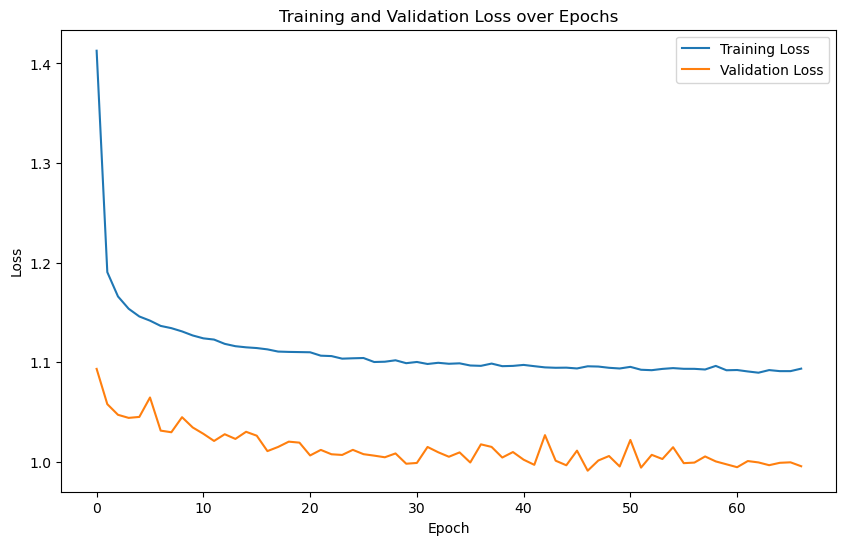

In [18]:
import matplotlib.pyplot as plt  # 导入 matplotlib.pyplot，而不是 matplotlib

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.savefig(F'../loss_curve_fig/slide_seq_human_kidney_random_mask_finetune_full_loss_curve{random_seed}.png', dpi=400)  # 保存图像为png格式，400 dpi
plt.savefig(F'../loss_curve_fig/slide_seq_human_kidney_random_mask_finetune_full_loss_curve{random_seed}.eps', format='eps', dpi=400)  # 保存图像为png格式，400 dpi

plt.show()


In [19]:
# 8. 使用 KNN 替代测试阶段的 FC 分类层
# 使用 encoder 提取训练集和测试集的 embedding
estim.model.eval()
with torch.no_grad():
    train_embeddings = estim.model.encoder(torch.tensor(X_train).float().to(device)).cpu().numpy()
    test_embeddings = estim.model.encoder(torch.tensor(X_test).float().to(device)).cpu().numpy()

In [20]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

    

    # 初始化和训练KNN分类器
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_embeddings, y_train)
    
    # 模型预测
predictions = knn.predict(test_embeddings)

    # 计算准确率和 F1 分数
accuracy = accuracy_score(y_test, predictions)
print(f"KNN Accuracy on Test Data: {accuracy}")
f1 = f1_score(y_test, predictions, average='weighted')
print(f"Weighted F1 Score: {f1}")
    
macro_f1 = f1_score(y_test, predictions, average='macro')
print(f'Macro F1 Score: {macro_f1}')

    # 计算随机猜测的准确率
class_probabilities = np.bincount(y_test) / len(y_test)
random_accuracy = np.sum(class_probabilities ** 2)
print(f"Random Guess Accuracy: {random_accuracy}")

    # 生成分类报告
report = classification_report(y_test, predictions, target_names=label_encoder.classes_)
print(report)

KNN Accuracy on Test Data: 0.646563242280285
Weighted F1 Score: 0.6208544056983325
Macro F1 Score: 0.36979948706154975
Random Guess Accuracy: 0.2927884776016484
                                                           precision    recall  f1-score   support

                          blood vessel smooth muscle cell       0.38      0.22      0.28       852
                                         endothelial cell       0.67      0.84      0.75     13511
                 kidney collecting duct intercalated cell       0.41      0.27      0.32      1032
                    kidney collecting duct principal cell       0.73      0.66      0.69      2040
          kidney distal convoluted tubule epithelial cell       0.60      0.48      0.53       618
                                     kidney granular cell       0.47      0.09      0.15       105
                           kidney interstitial fibroblast       0.32      0.09      0.14       781
kidney loop of Henle thick ascending limb epit

/home/hanchuangyi/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hanchuangyi/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hanchuangyi/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [21]:
with torch.no_grad():
    new_data_tensor = torch.tensor(new_data).float().to(device)
    SSL_embeddings = estim.model.encoder(new_data_tensor).detach().cpu().numpy()
new_adata = sc.read_h5ad(data_dir)
new_adata.obsm[f'SSL_RM_FT_{random_seed}'] = SSL_embeddings
new_adata.uns[f'RM_FT_y_test_{random_seed}'] = y_test
new_adata.uns[f'RM_FT_predictions_{random_seed}'] = predictions
new_adata.uns[f'RM_FT_target_names_{random_seed}'] = label_encoder.classes_
new_adata.uns[f'RM_FT_train_loss_{random_seed}'] = train_losses
new_adata.uns[f'RM_FT_val_loss_{random_seed}'] = val_losses
new_adata.write_h5ad(data_dir)

In [22]:

import pandas as pd
import os
import re

# 当前 Notebook 文件名
notebook_name = "slide_seq_human_kidney_random_mask_fine_tune_42.ipynb"

# 初始化需要打印的值
init_train_loss = train_losses[0] if 'train_losses' in globals() else None
init_val_loss = val_losses[0] if 'val_losses' in globals() else None
converged_epoch = len(train_losses) - patience if 'train_losses' in globals() else None
converged_val_loss = best_val_loss if 'best_val_loss' in globals() else None

# 打印所有所需的指标
print("Metrics Summary:")
if 'train_losses' in globals():
    print(f"init_train_loss\tinit_val_loss\tconverged_epoch\tconverged_val_loss\tmacro_f1\tweighted_f1\tmicor_f1")
    print(f"{init_train_loss:.3f}\t{init_val_loss:.3f}\t{converged_epoch}\t{converged_val_loss:.3f}\t{macro_f1:.3f}\t{f1:.3f}\t{accuracy:.3f}")
else:
    print(f"macro_f1\tweighted_f1\tmicor_f1")
    print(f"{macro_f1:.3f}\t{f1:.3f}\t{accuracy:.3f}")

# 保存结果到 CSV 文件
output_data = {
    'dataset_split_random_seed': [int(random_seed)],
    'dataset': ['slide_seq_human_kidney'],
    'method': [re.search(r'kidney_(.*?)_\d+', notebook_name).group(1)],
    'init_train_loss': [init_train_loss if init_train_loss is not None else ''],
    'init_val_loss': [init_val_loss if init_val_loss is not None else ''],
    'converged_epoch': [converged_epoch if converged_epoch is not None else ''],
    'converged_val_loss': [converged_val_loss if converged_val_loss is not None else ''],
    'macro_f1': [macro_f1],
    'weighted_f1': [f1],
    'micor_f1': [accuracy]
}
output_df = pd.DataFrame(output_data)

# 保存到当前目录下名为 results 的文件夹中
if not os.path.exists('results'):
    os.makedirs('results')

csv_filename = f"results/{os.path.splitext(notebook_name)[0]}_results.csv"
output_df.to_csv(csv_filename, index=False)


Metrics Summary:
init_train_loss	init_val_loss	converged_epoch	converged_val_loss	macro_f1	weighted_f1	micor_f1
1.413	1.093	47	0.991	0.370	0.621	0.647
